In [ ]:
https://docs.google.com/spreadsheets/d/1cPn8LIiA2f553kfYSMBTZwDVPnWGDI47/edit?usp=sharing&ouid=113408290871906538763&rtpof=true&sd=true

In [ ]:
import pandas as pd
import gdown
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Helper Function
def import_from_gdrive(id_file, file_name, sheet_name):
    link = 'https://drive.google.com/uc?id=' + id_file
    output_file = '/content/' + file_name
    gdown.download(link, output_file, quiet=False)

    df = pd.read_excel(output_file, sheet_name=sheet_name)
    return df

In [ ]:
indo = import_from_gdrive('1cPn8LIiA2f553kfYSMBTZwDVPnWGDI47','Dataset buat convert region.xlsx','Indonesia')
filipina = import_from_gdrive('1cPn8LIiA2f553kfYSMBTZwDVPnWGDI47','Dataset buat convert region.xlsx','Filipina')

Downloading...
From: https://drive.google.com/uc?id=1cPn8LIiA2f553kfYSMBTZwDVPnWGDI47
To: /content/Dataset buat convert region.xlsx
100%|██████████| 25.0k/25.0k [00:00<00:00, 37.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cPn8LIiA2f553kfYSMBTZwDVPnWGDI47
To: /content/Dataset buat convert region.xlsx
100%|██████████| 25.0k/25.0k [00:00<00:00, 23.7MB/s]


In [ ]:
indo.drop(columns=['No.','PDRB','Persentase Pembentukan Modal Tetap Bruto'],inplace=True)

In [ ]:
filipina.drop(columns=["No.","PDRB (₱)", "Persentase Pembentukan Modal Tetap Bruto"],inplace=True)

In [ ]:
indo['Country'] = "Indonesia"
filipina['Country'] = "Filipina"

In [ ]:
filipina = filipina.rename(columns={'Region' : 'Provinsi'})

In [ ]:
# indo_scaler = StandardScaler()
# filipina_scaler = StandardScaler()
# indo['Laju Pertumbuhan Pengeluaran Konsumsi Rumah Tangga'] = indo_scaler.fit_transform(indo[['Laju Pertumbuhan Pengeluaran Konsumsi Rumah Tangga']])
# filipina['Laju Pertumbuhan Pengeluaran Konsumsi Rumah Tangga'] = filipina_scaler.fit_transform(filipina[['Laju Pertumbuhan Pengeluaran Konsumsi Rumah Tangga']])


In [ ]:
# Menggabungkan kedua dataset
combined_data = pd.concat([indo, filipina], ignore_index=True)

In [ ]:
# Menyiapkan scaler
scaler = StandardScaler()

# Menstandarisasi data Indonesia
indonesia_data_scaled = indo.copy()
indonesia_data_scaled['Laju Pertumbuhan Pengeluaran Konsumsi Rumah Tangga'] = scaler.fit_transform(indo[['Laju Pertumbuhan Pengeluaran Konsumsi Rumah Tangga']])

# Menstandarisasi data Filipina
filipina_data_scaled = filipina.copy()
filipina_data_scaled['Laju Pertumbuhan Pengeluaran Konsumsi Rumah Tangga'] = scaler.fit_transform(filipina[['Laju Pertumbuhan Pengeluaran Konsumsi Rumah Tangga']])

# Menggabungkan kedua dataset yang sudah distandarisasi
combined_data = pd.concat([indonesia_data_scaled, filipina_data_scaled], ignore_index=True)

In [ ]:
combined_data.head()

,Provinsi,Laju Pertumbuhan Pengeluaran Konsumsi Rumah Tangga,Country
0,ACEH,-1.074407,Indonesia
1,SUMATERA UTARA,-0.245386,Indonesia
2,SUMATERA BARAT,-1.003852,Indonesia
3,RIAU,-0.792187,Indonesia
4,JAMBI,0.477802,Indonesia


In [ ]:
# # Normalisasi data laju pertumbuhan pengeluaran
# scaler = StandardScaler()
# combined_data_scaled = scaler.fit_transform(combined_data[['Laju Pertumbuhan Pengeluaran Konsumsi Rumah Tangga']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

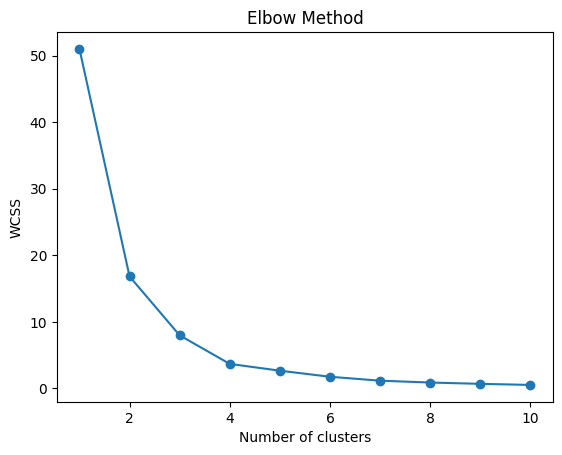

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


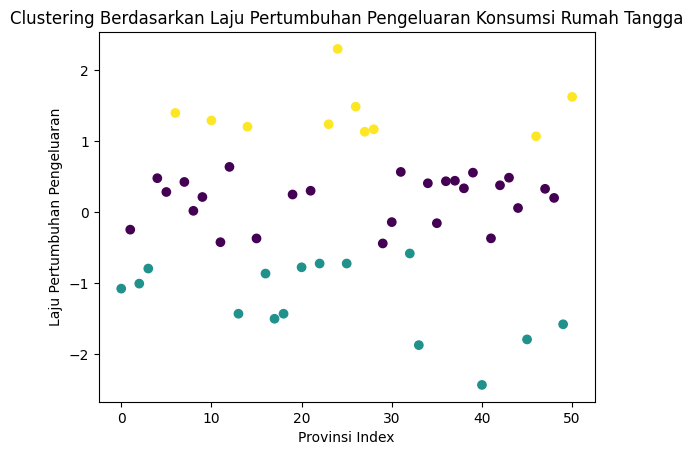

                                             Provinsi  \
0                                                ACEH   
1                                      SUMATERA UTARA   
2                                      SUMATERA BARAT   
3                                                RIAU   
4                                               JAMBI   
5                                    SUMATERA SELATAN   
6                                            BENGKULU   
7                                             LAMPUNG   
8                                KEP. BANGKA BELITUNG   
9                                           KEP. RIAU   
10                                        DKI JAKARTA   
11                                         JAWA BARAT   
12                                        JAWA TENGAH   
13                                      DI YOGYAKARTA   
14                                         JAWA TIMUR   
15                                             BANTEN   
16                             

In [ ]:
# Menentukan jumlah cluster menggunakan Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(combined_data[['Laju Pertumbuhan Pengeluaran Konsumsi Rumah Tangga']].values.reshape(-1, 1))
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Menentukan jumlah cluster (misalkan 3 berdasarkan Elbow Method)
kmeans = KMeans(n_clusters=3, random_state=42)
combined_data['Cluster'] = kmeans.fit_predict(combined_data[['Laju Pertumbuhan Pengeluaran Konsumsi Rumah Tangga']].values.reshape(-1, 1))

# Visualisasi hasil clustering
plt.scatter(combined_data.index, combined_data['Laju Pertumbuhan Pengeluaran Konsumsi Rumah Tangga'], c=combined_data['Cluster'], cmap='viridis')
plt.xlabel('Provinsi Index')
plt.ylabel('Laju Pertumbuhan Pengeluaran')
plt.title('Clustering Berdasarkan Laju Pertumbuhan Pengeluaran Konsumsi Rumah Tangga')
plt.show()

# Melihat hasil clustering
print(combined_data)

# Mengelompokkan hasil berdasarkan cluster
for cluster in combined_data['Cluster'].unique():
    cluster_data = combined_data[combined_data['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(cluster_data[['Country', 'Provinsi', 'Laju Pertumbuhan Pengeluaran Konsumsi Rumah Tangga']])

In [ ]:
# # Melihat hasil clustering
# print(combined_data)

# Mengelompokkan hasil berdasarkan cluster dan mencetaknya
for cluster in combined_data['Cluster'].unique():
    cluster_data = combined_data[combined_data['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(cluster_data[['Country', 'Provinsi', 'Laju Pertumbuhan Pengeluaran Konsumsi Rumah Tangga']])


Cluster 1:
      Country                         Provinsi  \
0   Indonesia                             ACEH   
2   Indonesia                   SUMATERA BARAT   
3   Indonesia                             RIAU   
13  Indonesia                    DI YOGYAKARTA   
16  Indonesia                             BALI   
17  Indonesia              NUSA TENGGARA BARAT   
18  Indonesia              NUSA TENGGARA TIMUR   
20  Indonesia                KALIMANTAN TENGAH   
22  Indonesia                 KALIMANTAN TIMUR   
25  Indonesia                  SULAWESI TENGAH   
32  Indonesia                      PAPUA BARAT   
33  Indonesia                            PAPUA   
40   Filipina                  MIMAROPA Region   
45   Filipina  Region IX (Zamboanga Peninsula)   
49   Filipina             Region XIII (Caraga)   

    Laju Pertumbuhan Pengeluaran Konsumsi Rumah Tangga  
0                                           -1.074407   
2                                           -1.003852   
3               

# Result

In [ ]:
# Cluster 1:
#       Country                         Provinsi
# 0   Indonesia                             ACEH
# 2   Indonesia                   SUMATERA BARAT
# 3   Indonesia                             RIAU
# 13  Indonesia                    DI YOGYAKARTA
# 16  Indonesia                             BALI
# 17  Indonesia              NUSA TENGGARA BARAT
# 18  Indonesia              NUSA TENGGARA TIMUR
# 20  Indonesia                KALIMANTAN TENGAH
# 22  Indonesia                 KALIMANTAN TIMUR
# 25  Indonesia                  SULAWESI TENGAH
# 32  Indonesia                      PAPUA BARAT
# 33  Indonesia                            PAPUA
# 40   Filipina                  MIMAROPA Region
# 45   Filipina  Region IX (Zamboanga Peninsula)
# 49   Filipina             Region XIII (Caraga)

In [ ]:
# Cluster 0:
#       Country                                Provinsi
# 1   Indonesia                          SUMATERA UTARA
# 4   Indonesia                                   JAMBI
# 5   Indonesia                        SUMATERA SELATAN
# 7   Indonesia                                 LAMPUNG
# 8   Indonesia                    KEP. BANGKA BELITUNG
# 9   Indonesia                               KEP. RIAU
# 11  Indonesia                              JAWA BARAT
# 12  Indonesia                             JAWA TENGAH
# 15  Indonesia                                  BANTEN
# 19  Indonesia                        KALIMANTAN BARAT
# 21  Indonesia                      KALIMANTAN SELATAN
# 29  Indonesia                          SULAWESI BARAT
# 30  Indonesia                                  MALUKU
# 31  Indonesia                            MALUKU UTARA
# 34   Filipina           National Capital Region (NCR)
# 35   Filipina  Cordillera Administrative Region (CAR)
# 36   Filipina                Region I (Ilocos Region)
# 37   Filipina              Region II (Cagayan Valley)
# 38   Filipina              Region III (Central Luzon)
# 39   Filipina                Region IV-A (CALABARZON)
# 41   Filipina                 Region V (Bicol Region)
# 42   Filipina             Region VI (Western Visayas)
# 43   Filipina            Region VII (Central Visayas)
# 44   Filipina           Region VIII (Eastern Visayas)
# 47   Filipina                Region XI (Davao Region)
# 48   Filipina               Region XII (SOCCSKSARGEN)

In [ ]:
# Cluster 2:
#       Country                                           Provinsi
# 6   Indonesia                                           BENGKULU
# 10  Indonesia                                        DKI JAKARTA
# 14  Indonesia                                         JAWA TIMUR
# 23  Indonesia                                   KALIMANTAN UTARA
# 24  Indonesia                                     SULAWESI UTARA
# 26  Indonesia                                   SULAWESI SELATAN
# 27  Indonesia                                  SULAWESI TENGGARA
# 28  Indonesia                                          GORONTALO
# 46   Filipina                       Region X (Northern Mindanao)
# 50   Filipina  Bangsamoro Autonomous Region in Muslim Mindana...